In [1]:
# Import libraries:

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import libraries:

data = pd.read_csv('marketing_AB.csv', sep = ',')

#### Data understanding:

In [3]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
data = data.drop(columns = 'Unnamed: 0')

In [5]:
data.shape

(588101, 6)

In [6]:
data.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [7]:
data.dtypes

user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [9]:
data.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [10]:
data.describe(include = ['object', 'bool'])

,test group,converted,most ads day
count,588101,588101,588101
unique,2,2,7
top,ad,False,Friday
freq,564577,573258,92608


#### Data  preparation:

In [11]:
# Checking null values:

null_values = pd.DataFrame({'Total': data.isnull().sum(), 'Percentage': data.isnull().mean()*100})
null_values

,Total,Percentage
user id,0,0.0
test group,0,0.0
converted,0,0.0
total ads,0,0.0
most ads day,0,0.0
most ads hour,0,0.0


In [12]:
# Checking duplicate values:

data.duplicated().sum()

0

In [13]:
# Checking duplicate values in user column:

data['user id'].duplicated().sum()

0

In [14]:
# Converting object to category:

data['most ads day'] = data['most ads day'].astype('category')

In [15]:
# Converting boolean to integer:

data['converted'] = data['converted'].astype('int')

In [16]:
# Maping the test groups to new column:

data['a/b group'] = data['test group'].map({'ad': 'test', 'psa': 'control'})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user id        588101 non-null  int64   
 1   test group     588101 non-null  object  
 2   converted      588101 non-null  int64   
 3   total ads      588101 non-null  int64   
 4   most ads day   588101 non-null  category
 5   most ads hour  588101 non-null  int64   
 6   a/b group      588101 non-null  object  
dtypes: category(1), int64(4), object(2)
memory usage: 27.5+ MB


In [18]:
data

,user id,test group,converted,total ads,most ads day,most ads hour,a/b group
0,1069124,ad,0,130,Monday,20,test
1,1119715,ad,0,93,Tuesday,22,test
2,1144181,ad,0,21,Tuesday,18,test
3,1435133,ad,0,355,Tuesday,10,test
4,1015700,ad,0,276,Friday,14,test
...,...,...,...,...,...,...,...
588096,1278437,ad,0,1,Tuesday,23,test
588097,1327975,ad,0,1,Tuesday,23,test
588098,1038442,ad,0,3,Tuesday,23,test
588099,1496395,ad,0,1,Tuesday,23,test


In [19]:
group_size = data.groupby('a/b group')['user id'].count()
group_size

a/b group
control     23524
test       564577
Name: user id, dtype: int64

In [21]:
conversion_val = data.groupby('a/b group')['converted'].mean()
conversion_val

a/b group
control    0.017854
test       0.025547
Name: converted, dtype: float64

H0 (Null Hypothesis):
Conversion rate of ad group == conversion rate of psa group

H1 (Alternative Hypothesis):
Conversion rate of ad group != conversion rate of psa group

Significance level (alpha) = 0.05

table = pd.crosstab(data['a/b group'], data['converted'])
table

In [41]:
table = (data.groupby(['a/b group', 'converted']).size().unstack(fill_value = 0))
table

converted,0,1
a/b group,,
control,23104,420
test,550154,14423


In [42]:
# Statistical test (Chi-Square Test):

chi2, p_value, dof, expected = stats.chi2_contingency(table)

print(p_value)

1.998962306339e-13


In [30]:
# Confidence Interval:

control_rate = conversion_val['control']
test_rate = conversion_val['test']

n_control = group_size['control']
n_test = group_size['test']

diff = test_rate - control_rate

se = np.sqrt((control_rate * (1 - control_rate) / n_control) + (test_rate * (1 - test_rate) / n_test))

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print('Difference:',diff)
print('CI low:', ci_low, 'and' '\t CI high:', ci_high)

Difference: 0.007692453192201517
CI low: 0.00595090043017032 and	 CI high: 0.009434005954232714


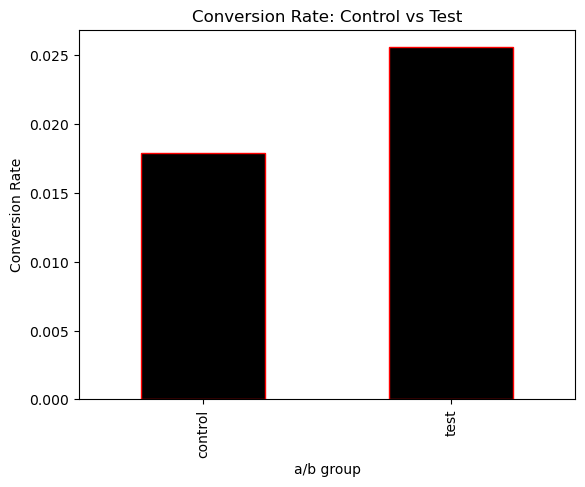

In [35]:
conversion_val.plot(kind = 'bar', color = 'black', edgecolor = 'red')
plt.title('Conversion Rate: Control vs Test')
plt.ylabel('Conversion Rate')
plt.show()

In [33]:
# Total ads in groups:

data.groupby('a/b group')['total ads'].describe()

,count,mean,std,min,25%,50%,75%,max
a/b group,,,,,,,,
control,23524.0,24.761138,42.860720,1.0,4.0,12.0,26.0,907.0
test,564577.0,24.823365,43.750456,1.0,4.0,13.0,27.0,2065.0


In [34]:
# Conversion by day:

data.groupby('most ads day')['converted'].mean().sort_values(ascending = False)

most ads day
Monday       0.032812
Tuesday      0.029840
Wednesday    0.024942
Sunday       0.024476
Friday       0.022212
Thursday     0.021571
Saturday     0.021051
Name: converted, dtype: float64